In [3]:
# If needed, create a virtual environment by uncommenting the line below:
!python -m venv .venv

# Activate the virtual environment by running the appropriate command for your OS:
# On Windows:
# !.\.venv\Scripts\activate

# On macOS/Linux:
!source .agentic_ai_venv/bin/activate 

# Install the required packages by uncommenting the line below:
%pip install -r ./requirements.txt

'source' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
from IPython.display import display
from pathlib import Path
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from typing import Tuple, cast


In [5]:
df = pd.read_csv("pet_adoption_data.csv")

In [6]:
df

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [7]:
df['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

<Figure size 1100x600 with 0 Axes>

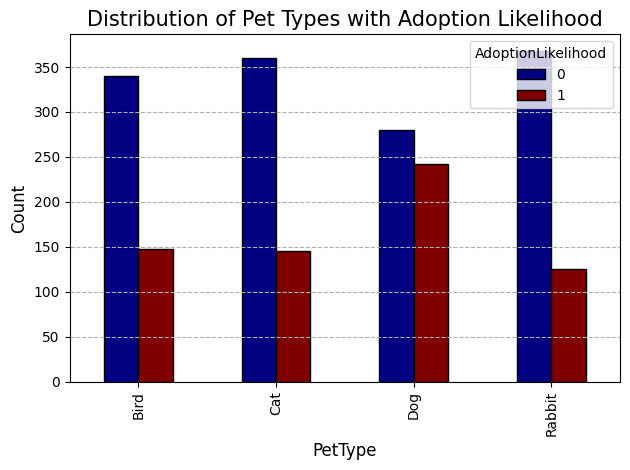

In [8]:
df['PetType'].value_counts()

# Count how many pets per (PetType, AdoptionLikelihood)
counts = df.groupby(['PetType', 'AdoptionLikelihood']).size().unstack(fill_value=0)
plt.figure(figsize=(11,6))
counts.plot(kind='bar', color=plt.cm.jet(np.linspace(0, 1, counts.shape[1])), edgecolor='black')
plt.title('Distribution of Pet Types with Adoption Likelihood', fontsize=15)
plt.xlabel('PetType', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.legend(title='AdoptionLikelihood')
plt.tight_layout()
plt.show()

<Figure size 1100x600 with 0 Axes>

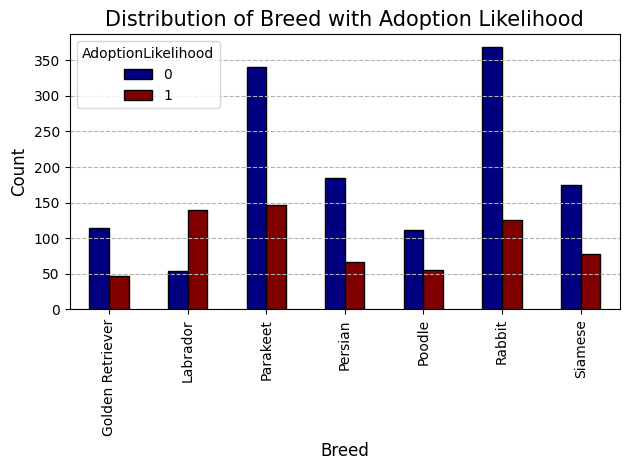

In [9]:
counts = df.groupby(['Breed', 'AdoptionLikelihood']).size().unstack(fill_value=0)
plt.figure(figsize=(11,6))
counts.plot(kind='bar', color=plt.cm.jet(np.linspace(0, 1, counts.shape[1])), edgecolor='black')
plt.title('Distribution of Breed with Adoption Likelihood', fontsize=15)
plt.xlabel('Breed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.legend(title='AdoptionLikelihood')
plt.tight_layout()
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_18676\1762506190.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['AgeGroup', 'AdoptionLikelihood']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

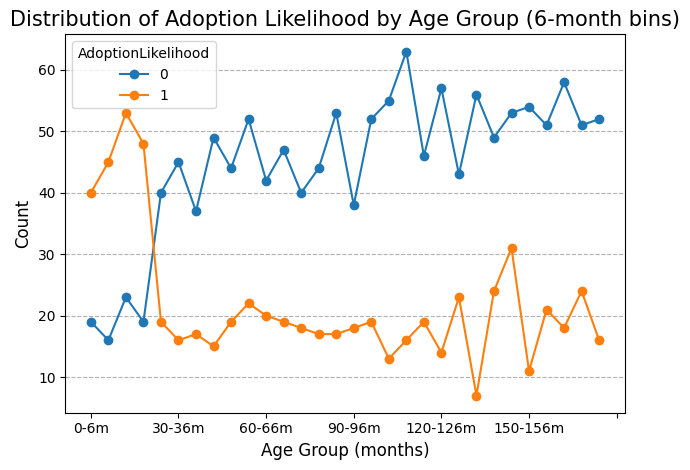

In [10]:
# Create bins of 6 months (same as before)
df['AgeGroup'] = pd.cut(
    df['AgeMonths'],
    bins=np.arange(0, df['AgeMonths'].max() + 6, 6), # Start at 0, end at max age + 6, step by 6 → creates intervals of 6 months
    right=False,
    labels=[f'{i}-{i+6}m' for i in range(0, df['AgeMonths'].max(), 6)] # Creates strings like '0-6m', '6-12m', '12-18m', etc.
)

# Count how many pets per (AgeGroup, AdoptionLikelihood)
counts = df.groupby(['AgeGroup', 'AdoptionLikelihood']).size().unstack(fill_value=0)

# Plot as line graph
plt.figure(figsize=(12,6))
counts.plot(kind='line', marker='o')  # marker='o' adds points to the line

plt.title('Distribution of Adoption Likelihood by Age Group (6-month bins)', fontsize=15)
plt.xlabel('Age Group (months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.legend(title='AdoptionLikelihood')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'The Chance of a Pet being Adopted depending on its Size')

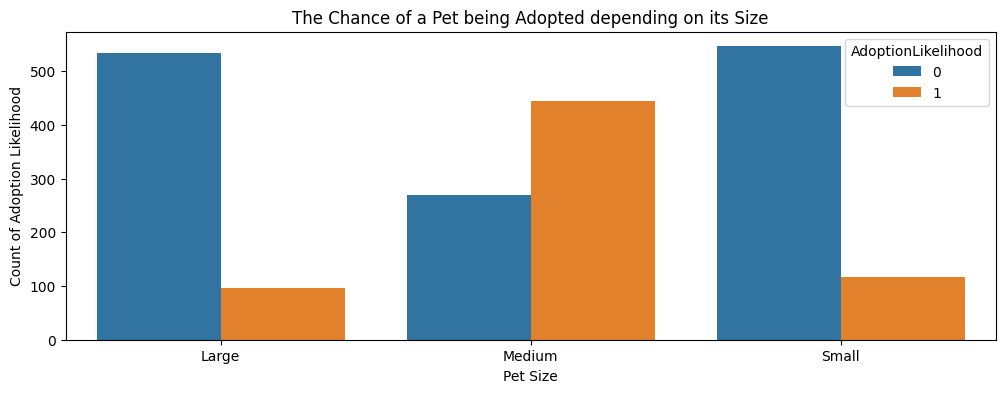

In [13]:
fig, ax =plt.subplots(figsize = [12, 4])
seaborn.countplot(x = df['Size'], hue = df['AdoptionLikelihood'])

ax.set_xlabel('Pet Size')
ax.set_ylabel('Count of Adoption Likelihood')
plt.title ('The Chance of a Pet being Adopted depending on its Size')

Text(0.5, 1.0, 'The Chance of a Pet being Adopted depending on its Color')

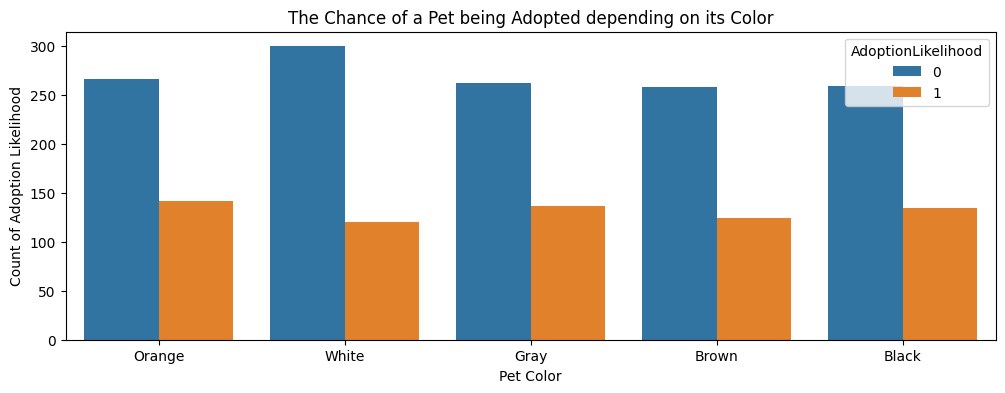

In [14]:
fig, ax =plt.subplots(figsize = [12, 4])
seaborn.countplot(x = df['Color'], hue = df['AdoptionLikelihood'])

ax.set_xlabel('Pet Color')
ax.set_ylabel('Count of Adoption Likelihood')
plt.title ('The Chance of a Pet being Adopted depending on its Color')

In [15]:
df_adoption = df[df['AdoptionLikelihood'] ==1]
df_adoption

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,AgeGroup
7,507,Cat,Siamese,13,Orange,Large,7.252683,1,0,3,137,0,1,12-18m
11,511,Rabbit,Rabbit,5,White,Small,29.078056,1,0,60,462,0,1,0-6m
14,514,Cat,Persian,160,Brown,Medium,6.303899,1,0,11,404,0,1,156-162m
17,517,Cat,Persian,50,White,Medium,28.982929,1,0,13,109,0,1,48-54m
22,522,Dog,Labrador,3,Gray,Large,15.576273,1,0,50,369,1,1,0-6m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2493,Bird,Parakeet,115,Orange,Small,24.967156,1,0,37,358,1,1,114-120m
1995,2495,Rabbit,Rabbit,72,Black,Medium,26.517957,0,0,69,429,1,1,72-78m
1999,2499,Cat,Persian,16,Gray,Medium,18.007326,0,0,13,404,0,1,12-18m
2001,2501,Bird,Parakeet,179,Brown,Small,29.475254,1,0,69,197,0,1,174-180m


Text(0.5, 1.0, 'The Number of pets adopted depending on its size')

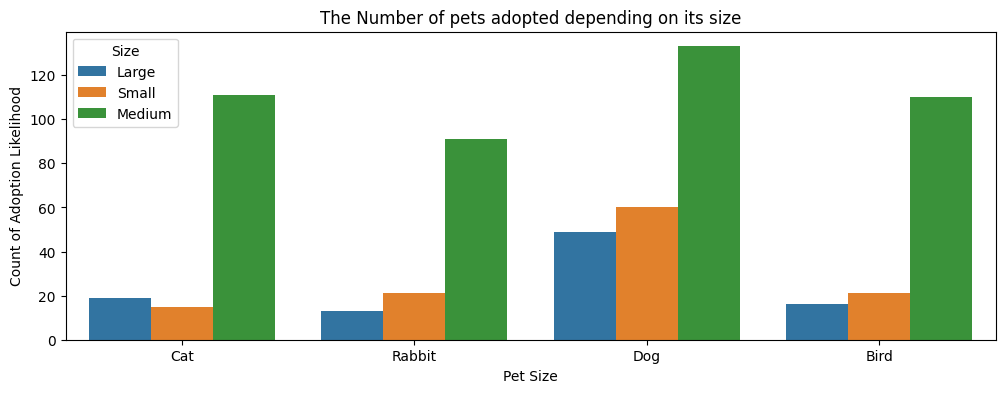

In [16]:
fig, ax =plt.subplots(figsize = [12, 4])
seaborn.countplot(x = df_adoption['PetType'], hue = df_adoption['Size'])

ax.set_xlabel('Pet Size')
ax.set_ylabel('Count of Adoption Likelihood')
plt.title ('The Number of pets adopted depending on its size')

Text(0.5, 1.0, 'The Number of pets adopted depending on its color')

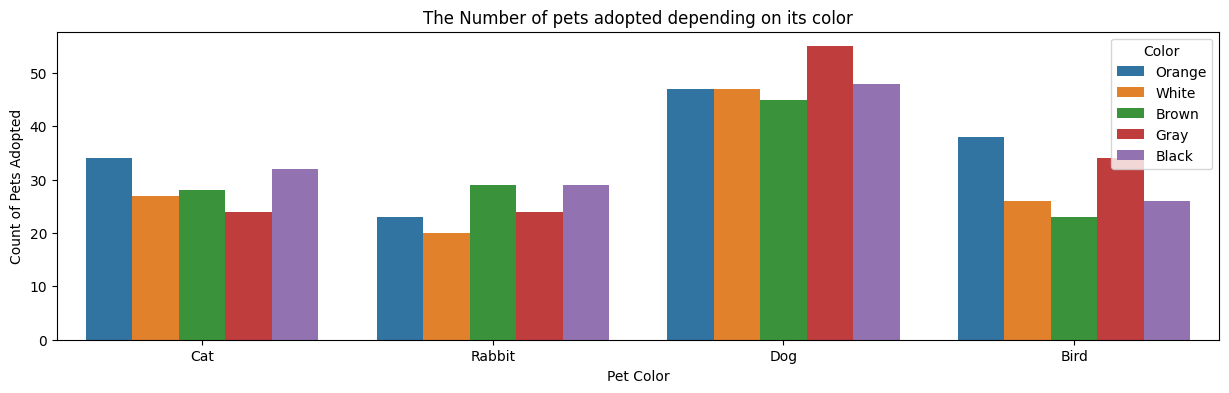

In [17]:
fig, ax =plt.subplots(figsize = [15, 4])
seaborn.countplot(x = df_adoption['PetType'], hue = df_adoption['Color'])

ax.set_xlabel('Pet Color')
ax.set_ylabel('Count of Pets Adopted')
plt.title ('The Number of pets adopted depending on its color')

In [18]:
df_plot = df[['WeightKg', 'AdoptionLikelihood']].copy()

# Create 1-kg bins from 0 to 30
bins = np.arange(0, 31, 1)  
df_plot['WeightBin'] = pd.cut(df_plot['WeightKg'], bins=bins, right=False)

# Count number of pets per bin and adoption likelihood
weight_counts = df_plot.groupby(['WeightBin', 'AdoptionLikelihood']).size().reset_index(name='Count')
weight_counts['WeightStart'] = weight_counts['WeightBin'].apply(lambda x: x.left)

C:\Users\julia\AppData\Local\Temp\ipykernel_18676\3047752311.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weight_counts = df_plot.groupby(['WeightBin', 'AdoptionLikelihood']).size().reset_index(name='Count')


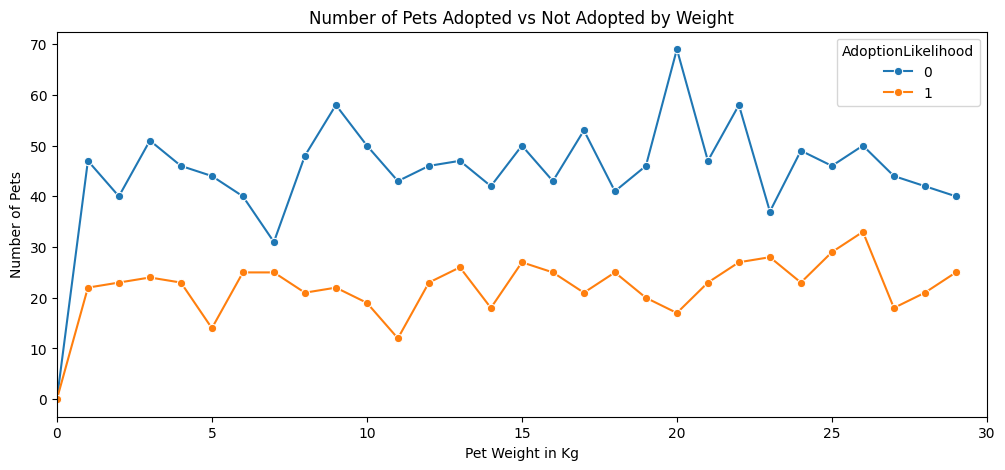

In [19]:
fig, ax = plt.subplots(figsize=[12,5])
seaborn.lineplot(data=weight_counts, x='WeightStart', y='Count', hue='AdoptionLikelihood', marker='o', ax=ax )

ax.set_xlabel('Pet Weight in Kg')
ax.set_ylabel('Number of Pets')
plt.title('Number of Pets Adopted vs Not Adopted by Weight')
plt.xlim(0, 30)
plt.show()

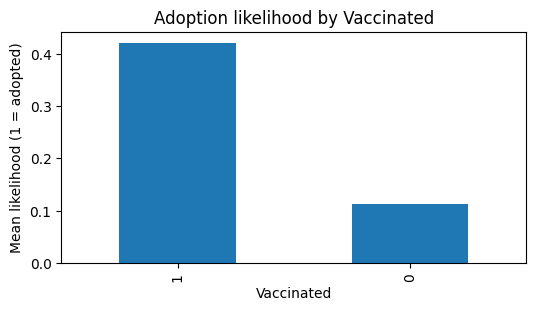

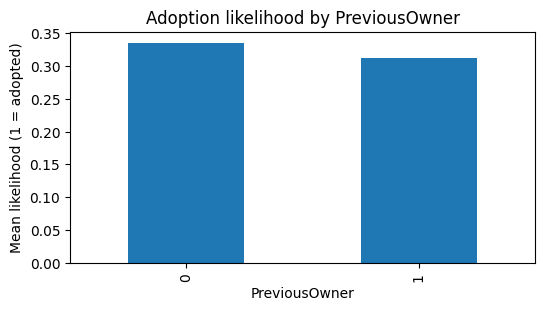

In [20]:
for col in ['Vaccinated', 'PreviousOwner']:
    adoption_rate = df.groupby(col)['AdoptionLikelihood'].mean().sort_values(ascending=False)
    adoption_rate.plot(kind='bar', figsize=(6,3))
    plt.title(f"Adoption likelihood by {col}")
    plt.ylabel("Mean likelihood (1 = adopted)")
    plt.show()

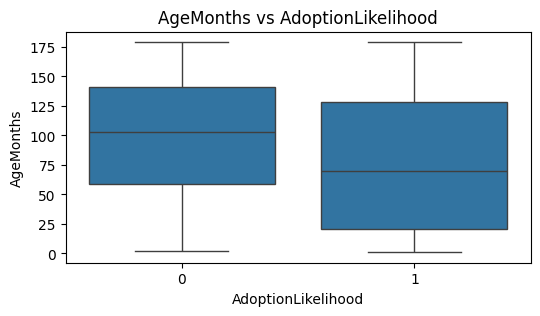

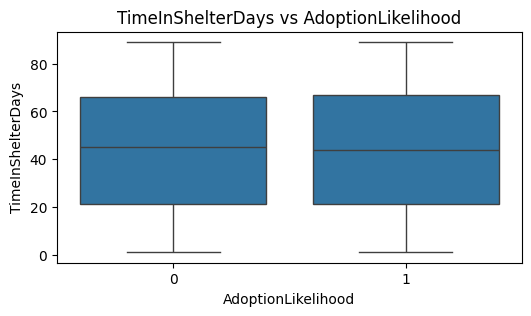

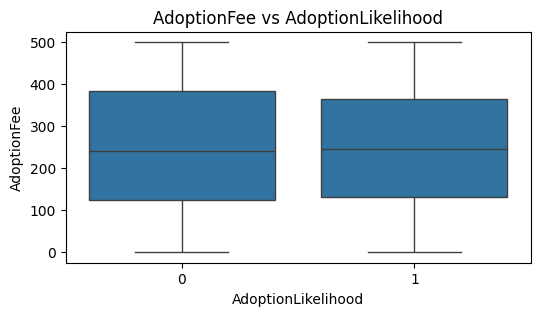

In [21]:
num_cols = ['AgeMonths', 'TimeInShelterDays', 'AdoptionFee']
for col in num_cols:
    plt.figure(figsize=(6,3))
    seaborn.boxplot(x='AdoptionLikelihood', y=col, data=df)
    plt.title(f"{col} vs AdoptionLikelihood")
    plt.show()

In [ ]:
df.isnull().sum()

### Baseline Model

To have a starting point against which to measure our improvements, let's quickly create a baseline model.

Gradient-boosted trees are generally a good starting point, so let's start from there.

Bonus question: Why are gradient-boosted trees a good choice to get a baseline?

<!-- Answer: Gradient-boosted trees are a good choice because they generally perform well on structured data, can handle both numerical and categorical features, and they are robust to outliers. -->

For the `HistGradientBoostingRegressor` model to work, we need to specify the categorical features, and each category must have less than 256 values.

To specify the categorical features, we can either:
- Use the `categorical_features='from_dtype'` option, which will consider columns that are of the pandas dtype `category` as categorical.
- Explicitly specify the names of the categorical columns using  `categorical_features=['PetType'...]`.

It is more flexible to use the first option (since we can change our pre-processing without changing the model), but it also means that we must convert the relevant columns to the `category` dtype.

As you can see using `df.dtypes`, most of the categorical columns are of type `object`, and the "Address" column, if converted to a category, would have too many categories.

The 'Address' column is not really categorical, so for now let's drop it in the pre-processing step.

We can use `scikit-learn`'s `ColumnTransformer` and `Pipeline` to achieve this in a convenient way.

First, let's identify the categorical features in the dataset.

In [22]:
from typing import Callable, cast
from sklearn.exceptions import NotFittedError
from sklearn.utils.validation import check_is_fitted
from IPython.display import display
from pathlib import Path
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas._typing

In [23]:
X = df[['PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee','PreviousOwner']]
y = df['AdoptionLikelihood']

X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.3)
print(f"X_train Shape: {X_train.shape}")
print(f"Y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (1404, 11)
Y_train Shape: (1404,)
X_test Shape: (603, 11)
y_test Shape: (603,)


In [33]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

def baseline_accuracy(X_train, y_train, X_test, y_test):
    dummy = DummyClassifier(strategy='most_frequent')
    dummy.fit(X_train, y_train)
    y_pred = dummy.predict(X_test)
    return accuracy_score(y_test, y_pred)


baseline_acc = baseline_accuracy(X_train, y_train, X_test, y_test)


In [34]:
results_df = pd.DataFrame({
    "Model": ["DummyClassifier"],
    "Accuracy": [baseline_acc]
})

print(results_df)

             Model  Accuracy
0  DummyClassifier  0.681592


### Full Preprocessing + Pipeline with Feature Engineering

In [26]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### 1. Feature Engineering

In [27]:
# # Fee per month (normalize AdoptionFee by AgeMonths)
# df['FeePerMonth'] = df['AdoptionFee'] / (df['AgeMonths'])

# # Healthy_Vaccinated: pets that are both vaccinated and healthy
# df['Healthy_Vaccinated'] = ((df['Vaccinated'] == 1) & (df['HealthCondition'] == 0)).astype(int)


# # -------------------------------
# # Define columns
# # -------------------------------

# numeric_features = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee', 'FeePerMonth', 'Healthy_Vaccinated']
# categorical_onehot = ['PetType', 'Breed', 'Color']
# ordinal_features = ['Size']  # Small < Medium < Large

In [28]:
# ADD COLUMN Healthy_Vaccinated: pets that are both vaccinated and healthy
df['Healthy_Vaccinated'] = ((df['Vaccinated'] == 1) & (df['HealthCondition'] == 0)).astype(int)

In [29]:
def feature_eng() -> ColumnTransformer :
    
    numeric_features = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee', 'Healthy_Vaccinated']
    column_transformer = ColumnTransformer(transformers=[
    # One-hot encode categorical columns
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), ['PetType', 'Breed', 'Color']),
            
    # Ordinal encode 'Size'
    ('ordinal', OrdinalEncoder(categories=[['Small', 'Medium', 'Large']]), ['Size']),
            
    # Standard scale numeric columns
    ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough')
    return  column_transformer

feat_eng_transformer = feature_eng()


In [30]:
def build_preprocessing_pipeline(feat_eng_transformer: ColumnTransformer) -> Pipeline:
    
    # Drop the target column ["AdoptionLikelihood"] 
    drop_column = ColumnTransformer(
        transformers=[
            ("drop_target", "drop", ["AdoptionLikelihood"])
        ],
        remainder="passthrough",
        verbose_feature_names_out=False
    )

    # type casting
    type_casting = ColumnTransformer(
        transformers=[
            ("cast_category", FunctionTransformer(lambda x: x.astype("category")), ['PetType', 'Breed', 'Color', 'Size'])
        ],
        remainder="passthrough",
        verbose_feature_names_out=False
    )
    # build pipeline
    preprocessing_pipeline = Pipeline([
        ("drop_column", drop_column),
        ("type_casting", type_casting),
        ("feature_eng", feat_eng_transformer)
    ])

    preprocessing_pipeline.set_output(transform="pandas")  # return DataFrame
    return preprocessing_pipeline

preprocessing_pipeline = build_preprocessing_pipeline(feat_eng_transformer)


In [ ]:
# Build final pipeline with preprocessing + model
final_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("model", RandomForestClassifier())
])

In [ ]:
display(final_pipeline)

### 2. Define transformers

In [ ]:
# # Numeric pipeline: impute missing values (median) + scale
# numeric_transform = Pipeline([
#     ('impute', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# # One-Hot categorical pipeline
# categorical_transform = Pipeline([
#     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
# ])

# # Ordinal pipeline for Size
# ordinal_transform = Pipeline([
#     ('ordinal', OrdinalEncoder(categories=[['Small','Medium','Large']]))
# ])

# # -------------------------------
# # Combine into ColumnTransformer
# # -------------------------------

# preprocessor = ColumnTransformer([
#     ('num', numeric_transform, numeric_features),
#     ('cat', categorical_transform, categorical_onehot),
#     ('ord', ordinal_transform, ordinal_features)
# ])

### 4. Full-pipeline model

In [ ]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(max_iter=1000, random_state=42))
# ])